I am going to perform a comprehensive exploratory data analysis (EDA) on the supplier summary table to uncover insights and detect anomalies. This will include cleaning the data, categorizing vendors into top- and low-selling groups, calculating weighted mean profit margins with 95% confidence intervals, and performing statistical tests to compare profitability. I will also generate correlation heatmaps and analyze freight costs to understand their impact on margins. Finally, I am going to create visualizations such as histograms, bar charts, and boxplots to summarize trends and support data-driven business decisions.


In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="PAQ2026@",
    database="inventory"
)

user = "root"
password = "PAQ2026%40"
host = "localhost"
database = "inventory"


In [3]:

import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}", echo=False)


In [ ]:
df = pd.read_sql("select * from supplier_sales_analysis;",engine)
df.columns

In [91]:
print("="*50, "Statistical Measure Of Final Data", "="*50)

df = pd.read_sql("select * from supplier_sales_analysis;",engine)
df.describe().T

================================================== Statistical Measure Of Final Data ==================================================


,count,mean,std,min,25%,50%,75%,max
VendorNumber,53460.0,10650.649458,18752.817531,2.00,3951.0000,7153.000,9552.0000,201359.00
Brand,53460.0,18039.228769,12661.713349,58.00,5793.5000,18761.500,25514.2500,90631.00
PurchasePrice,53460.0,24.385303,109.265287,0.36,6.8400,10.455,19.4825,5681.81
ActualPrice,53460.0,35.643671,148.240470,0.49,10.9900,15.990,28.9900,7499.99
TotalPurchaseQuantity,53460.0,3140.886831,11094.671673,1.00,36.0000,262.000,1975.7500,337660.00
TotalPurchaseDollars,53460.0,30106.693372,123063.195347,0.71,453.4575,3655.465,20738.2450,3811251.60
TotalFreight,53460.0,61301.280339,60903.987376,0.09,14069.8700,50293.620,79528.9900,257032.07
TotalSalesQuantity,53460.0,3077.482136,10952.441617,0.00,33.0000,261.000,1929.2500,334939.00
TotalSalesDollars,53460.0,42239.074419,167648.993573,0.00,729.2200,5298.045,28396.9150,5101919.51
TotalSalesPrice,53460.0,18793.783627,44951.091588,0.00,289.7100,2857.800,16059.5625,672819.31



The analysis of purchase prices shows a high standard deviation, which means there’s a lot of variation in product costs. Some items are very cheap, 
while others are very expensive. This makes it important for the business to negotiate better deals and evaluate whether these purchases are actually
generating healthy margins.

When we look at Total Purchase Quantity, the spread is quite wide, showing there’s no clear or consistent purchasing policy in place. 
Many items are being bought in bulk, but we need to ask if this really benefits the business in the long run and whether it has an impact on freight charges.
Freight expenses also show high variability, with both the average and deviation coming in high. This points toward inefficiencies in logistics and
the possibility that some vendors are overcharging for shipments.

Profitability metrics bring up some serious concerns. While a few products deliver very strong gross profits, the overall negative mean profit
margin percentage tells us that many items are being sold at a loss, which is pulling down overall performance. On the inventory side, the data
shows that most products move slowly, with low turnover and high variability. At the same time, a handful of items sell very quickly. 
This presents a clear opportunity: streamline or reduce slow-moving stock while putting more focus and resources on fast-moving winner


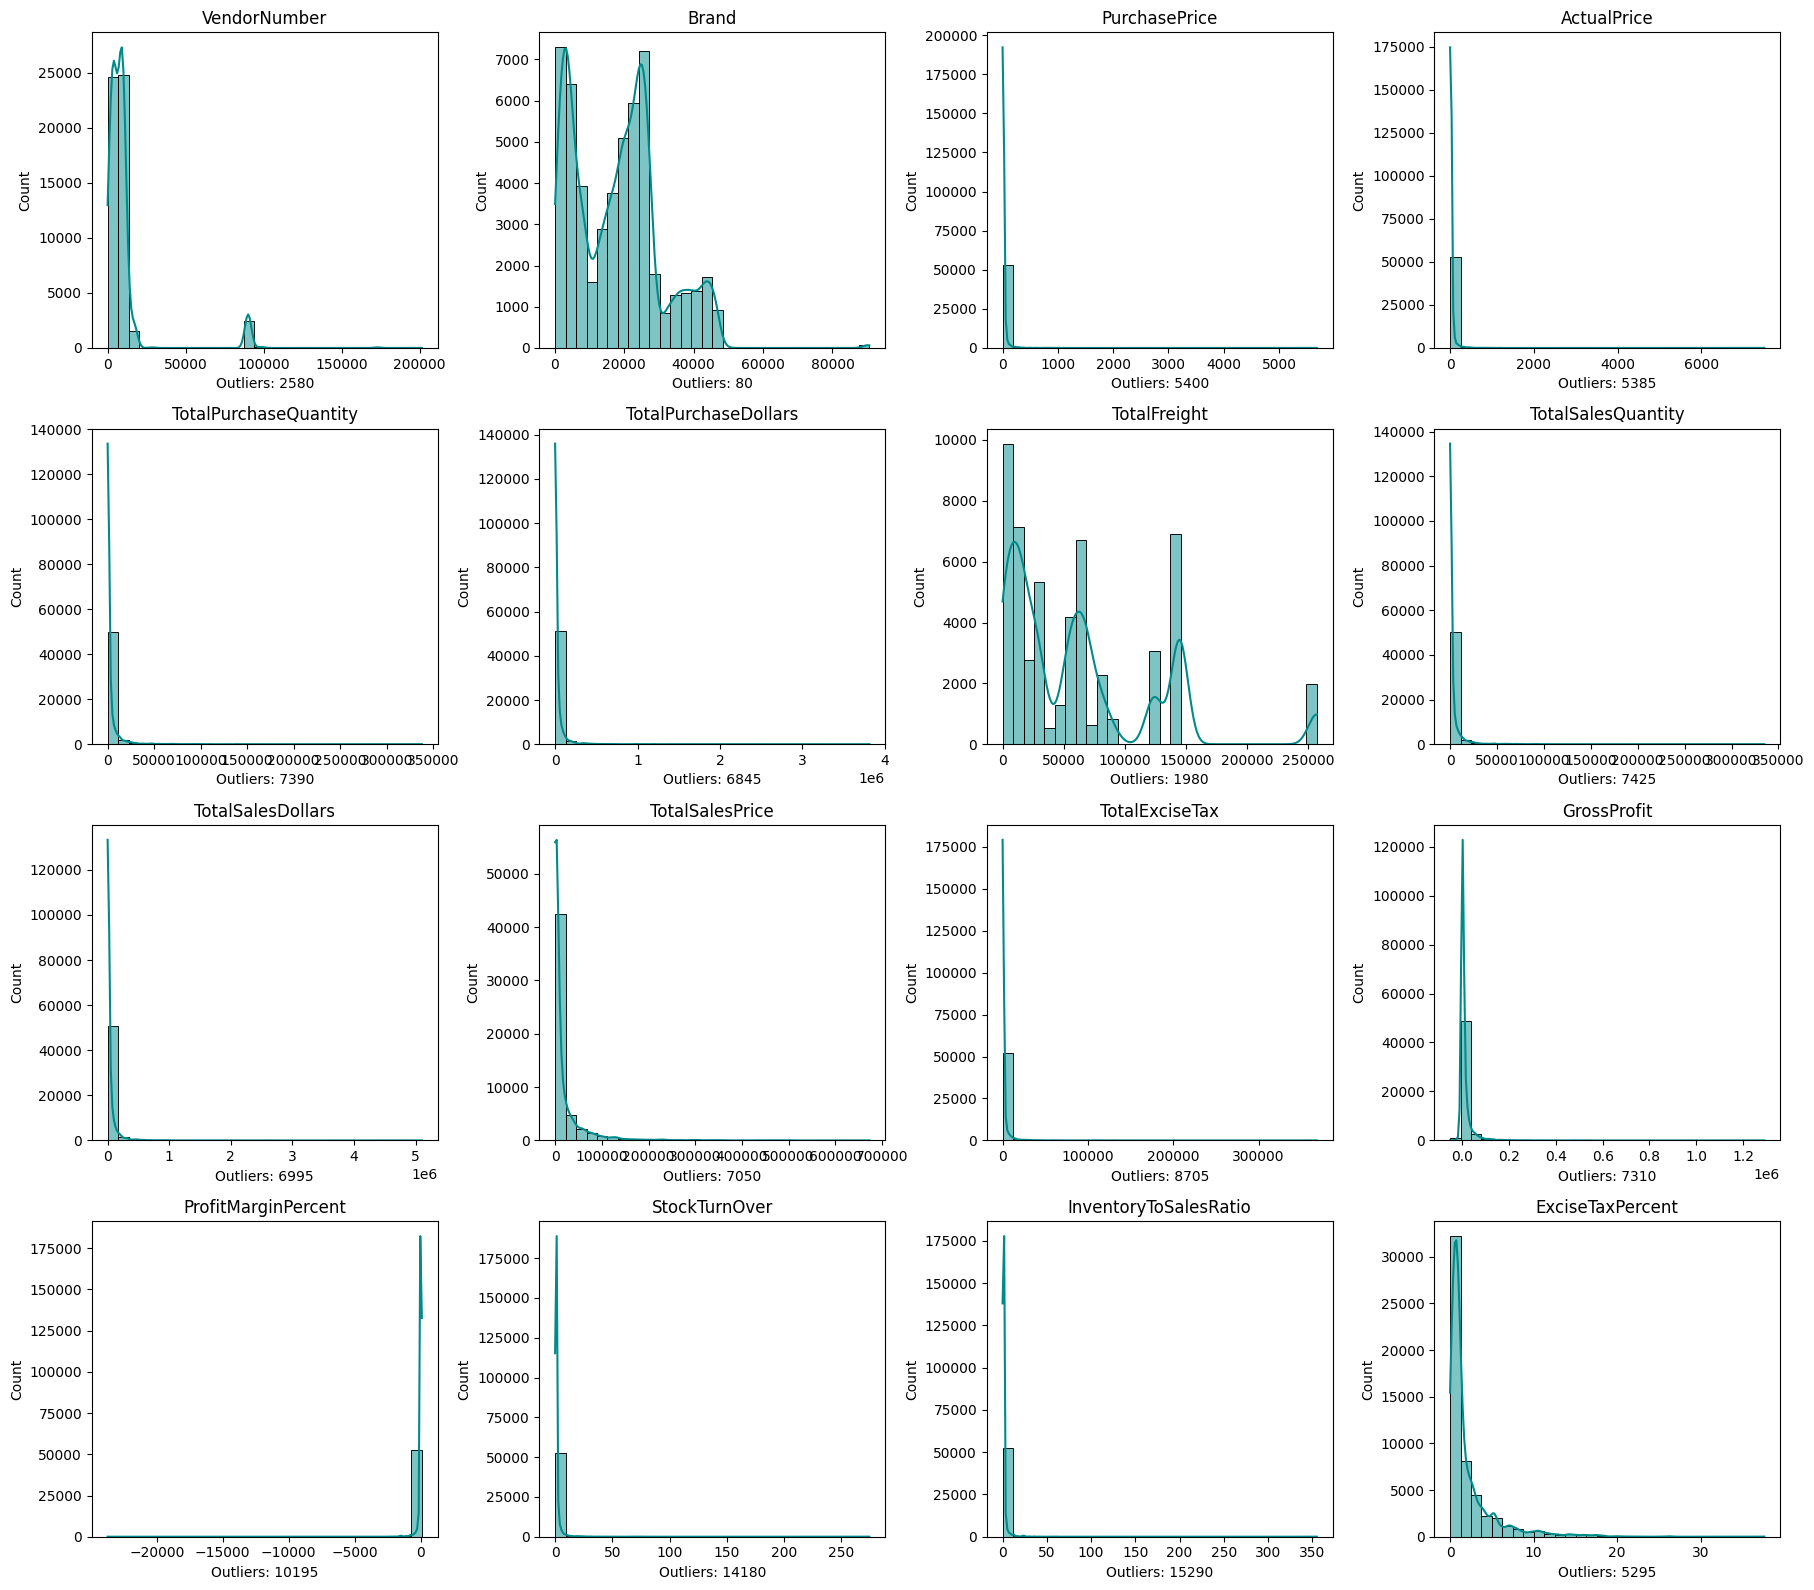

In [8]:



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your dataframe is loaded
# df = pd.read_csv("your_file.csv")  # if not already loaded

# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Step 2: Determine grid size dynamically
n = len(numerical_cols)
cols = 4  # number of columns per row
rows = int(np.ceil(n / cols))  # calculate rows needed

# Step 3: Plot histograms
plt.figure(figsize=(18, 4*rows))  # adjust figure height based on rows

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='darkcyan')
    plt.title(col)
    
    # Optional: Outlier detection using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    n_outliers = outliers.shape[0]
    
    # Show number of outliers on the plot
    plt.xlabel(f'Outliers: {n_outliers}')

plt.tight_layout()
plt.savefig("Histogram.png", dpi=300, bbox_inches="tight")  # save once
plt.show()



The histogram analysis indicates a highly imbalanced business structure, where a small number of outlier products dominate sales, profit, and costs, while the majority of products contribute minimally. This imbalance highlights the need for the company to adopt a more focused product strategy. By concentrating on high-performing items, the business can maximize profitability and reduce operational complexity.

At the same time, the presence of inefficiencies in freight, margins, and inventory reinforces the importance of reassessing current processes. The company should streamline its product portfolio by carefully evaluating underperforming items and determining whether they can be improved through better pricing, supplier negotiations, or promotional efforts. Products that remain consistently unprofitable should be phased out. In parallel, logistics and cost structures should be reviewed to minimize the disproportionate impact of high-cost outliers on overall business performance.

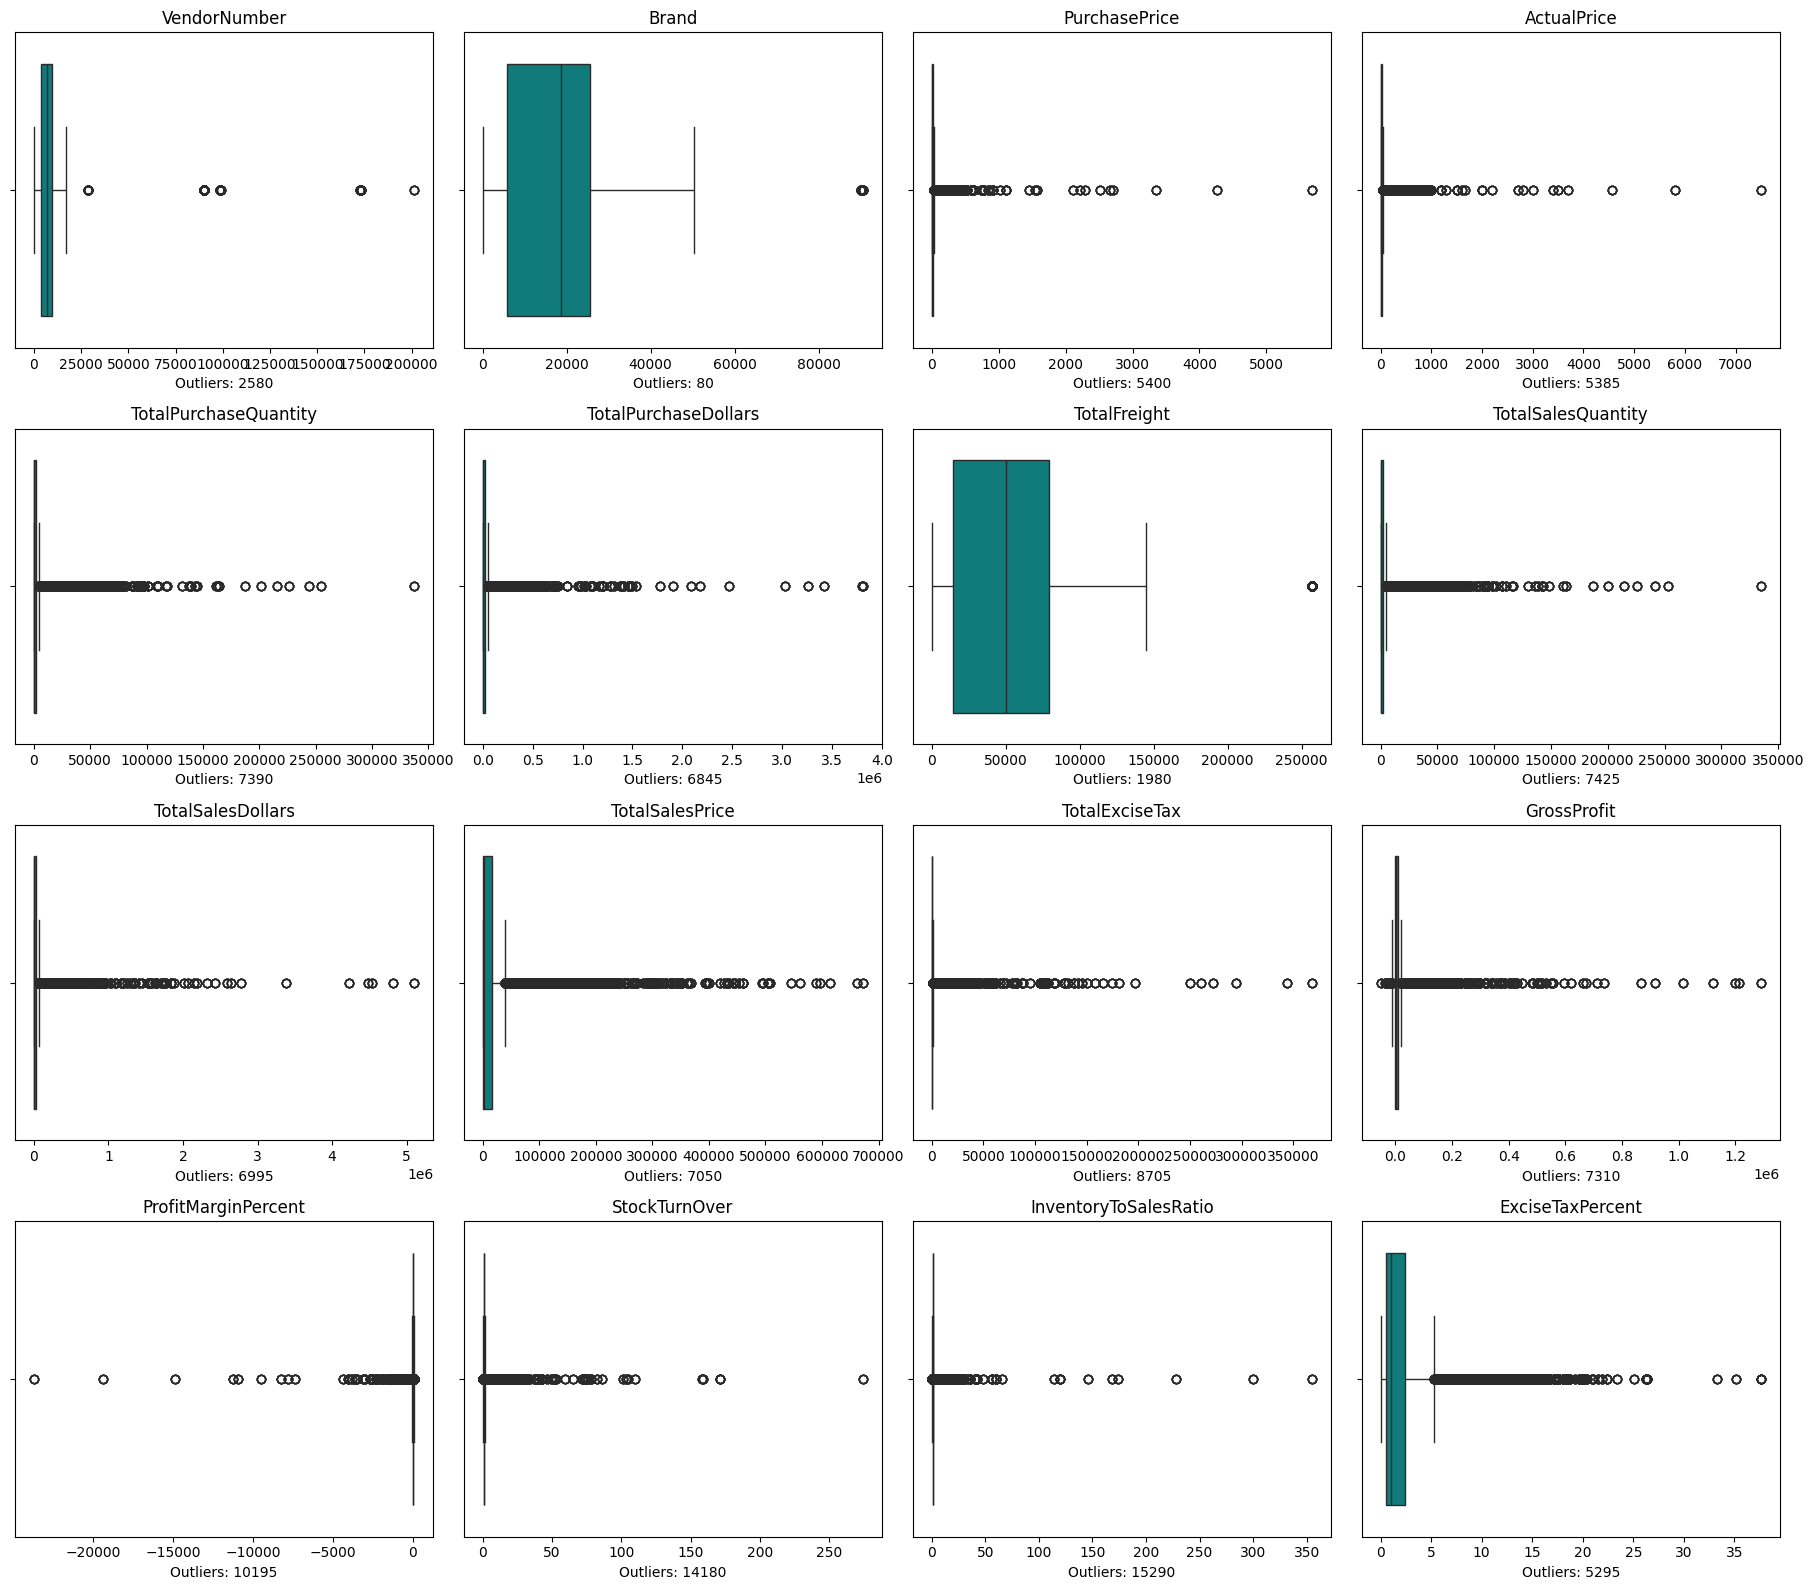

In [67]:
numerical_cols = df.select_dtypes(include=np.number).columns
n = len(numerical_cols)
cols = 4  # number of columns in the grid
rows = int(np.ceil(n / cols))  # number of rows needed

plt.figure(figsize=(18, 4*rows))  # adjust height based on rows

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=df[col], color='darkcyan')
    plt.title(col)

    # Outlier detection using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    n_outliers = outliers.shape[0]

    # Show number of outliers on the plot
    plt.xlabel(f'Outliers: {n_outliers}')

plt.tight_layout()
plt.savefig("BoxPlot.png", dpi=300, bbox_inches="tight")  # save once
plt.show()


The box plot analysis reveals a significant presence of outliers across nearly all numerical measures, with a small subset of vendors and products driving disproportionately high sales, profits, and tax contributions. This uneven distribution suggests that while these outliers may represent valuable business opportunities, they also pose risks if over-reliance develops on a few high-performing items or suppliers.

In next cell, we will filter out data since now we wont perform analysis on metrics below 0

In [68]:
df = pd.read_sql("""
    SELECT * 
    FROM supplier_sales_analysis
    WHERE ProfitMarginPercent > 0
      AND GrossProfit > 0
      AND TotalSalesQuantity > 0;
""", engine)

df




,VendorNumber,VendorName,Brand,PurchasePrice,Description,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreight,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,GrossProfit,ProfitMarginPercent,StockTurnOver,InventoryToSalesRatio,ExciseTaxPercent
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,23.86,Ch Lilian 09 Ladouys St Este,36.99,8.0,190.88,27.08,18.0,665.82,295.92,2.00,474.94,71.33,2.25,0.44,0.30
1,60,ADAMBA IMPORTS INTL INC,771,11.44,Bak's Krupnik Honey Liqueur,14.99,39.0,446.16,367.52,47.0,704.53,494.67,37.01,258.37,36.67,1.21,0.83,5.25
2,105,ALTAMAR BRANDS LLC,2529,23.25,Right Gin,29.99,12.0,279.00,62.39,12.0,359.88,59.98,9.44,80.88,22.47,1.00,1.00,2.62
3,105,ALTAMAR BRANDS LLC,8412,35.71,Tequila Ocho Plata Fresno,49.99,320.0,11427.20,62.39,307.0,15346.93,12947.41,242.15,3919.73,25.54,0.96,1.04,1.58
4,200,AMERICAN SPIRITS EXCHANGE,20789,9.73,Zin-phomaniac Znfdl,14.99,96.0,934.08,6.19,84.0,1511.16,287.84,9.43,577.08,38.19,0.88,1.14,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42815,9815,WINE GROUP INC,8527,1.32,Concannon Glen Ellen Wh Zin,4.99,2.0,2.64,27100.41,5.0,15.95,10.96,0.55,13.31,83.45,2.50,0.40,3.45
42816,8004,SAZERAC CO INC,5683,0.39,Dr McGillicuddy's Apple Pie,0.49,6.0,2.34,50293.62,134.0,65.66,1.47,7.04,63.32,96.44,22.33,0.04,10.72
42817,3924,HEAVEN HILL DISTILLERIES,9123,0.74,Deep Eddy Vodka,0.99,2.0,1.48,14069.87,2.0,1.98,0.99,0.10,0.50,25.25,1.00,1.00,5.05
42818,3960,DIAGEO NORTH AMERICA INC,6127,1.47,The Club Strawbry Margarita,1.99,1.0,1.47,257032.07,72.0,143.28,77.61,15.12,141.81,98.97,72.00,0.01,10.55


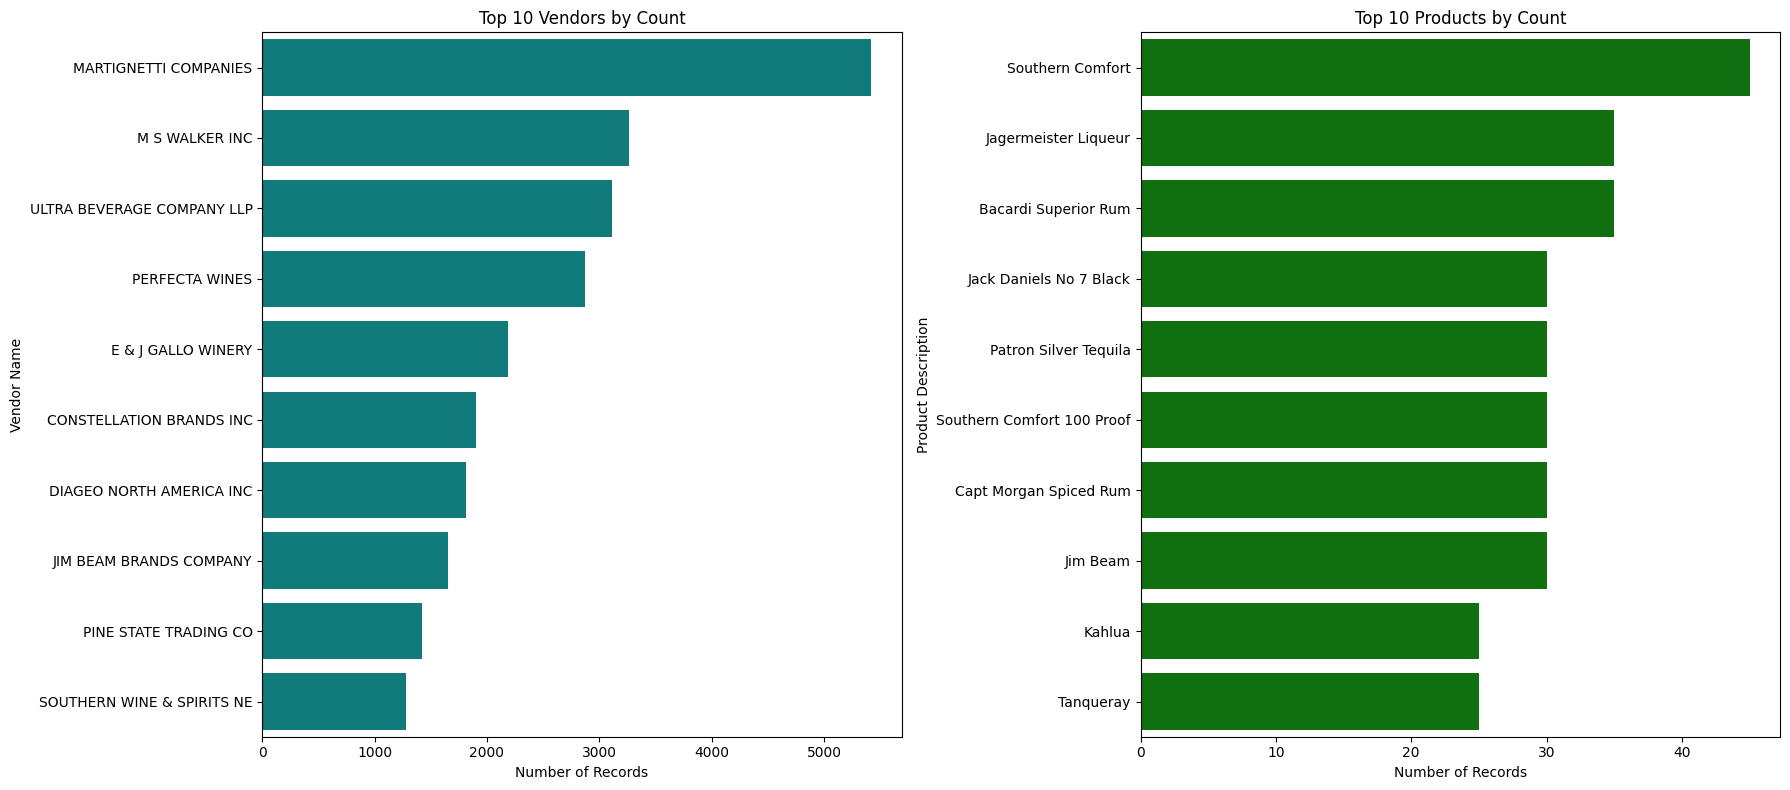

In [69]:
plt.figure(figsize=(18, 8))

# --- Top 10 Vendors ---
plt.subplot(1, 2, 1)
top_vendors = df['VendorName'].value_counts().head(10)
sns.barplot(x=top_vendors.values, y=top_vendors.index, color='darkcyan')  # Use color= for single color
plt.title('Top 10 Vendors by Count')
plt.xlabel('Number of Records')
plt.ylabel('Vendor Name')

# --- Top 10 Products ---
plt.subplot(1, 2, 2)
top_products = df['Description'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, color='green')  # Use color= for single color
plt.title('Top 10 Products by Count')
plt.xlabel('Number of Records')
plt.ylabel('Product Description')

plt.tight_layout()
plt.show()


Top 10 vendors by Count :

The chart on the left lists the Top 10 Vendors by Count, meaning it ranks vendors by how many times they appear in the company’s records.

MARTIGNETTI COMPANIES is by far the most frequent vendor, followed by others like ULTRA BEVERAGE COMPANY LLP and M S WALKER INC.

This suggests that a large portion of orders or purchases are concentrated among just a few main suppliers.

Top 10 Products by Count :

The chart on the right shows the Top 10 Products by Count—the products the company purchases most often.

Southern Comfort is the most frequently purchased product, followed by brands like Bacardi Superior Rum and Jagermeister Liqueur.

The fact that a few products dominate purchasing activity could mean these are best-sellers or essentials for the business.


The vendors analysis highlights a high concentration of purchases among a limited number of suppliers, with MARTIGNETTI COMPANIES and a handful of others accounting for the majority of transactions. While this concentration can support efficiency through established relationships and potential bulk discounts, it also increases supplier dependency risks. The company should leverage this position to negotiate more favorable terms with key vendors, while also exploring alternative suppliers to diversify its sourcing strategy and reduce potential disruptions.

Similarly, the product analysis shows that a small group of items, led by Southern Comfort, Bacardi Superior Rum, and Jägermeister Liqueur, dominate purchasing activity. These products may represent strong demand or essential stock, making them critical to revenue generation. The business should ensure that these items remain consistently available to avoid stockouts, while also assessing whether reliance on a narrow product range could limit growth opportunities. Diversifying the product portfolio by promoting complementary or emerging products could help balance sales, reduce risk, and expand market presence.






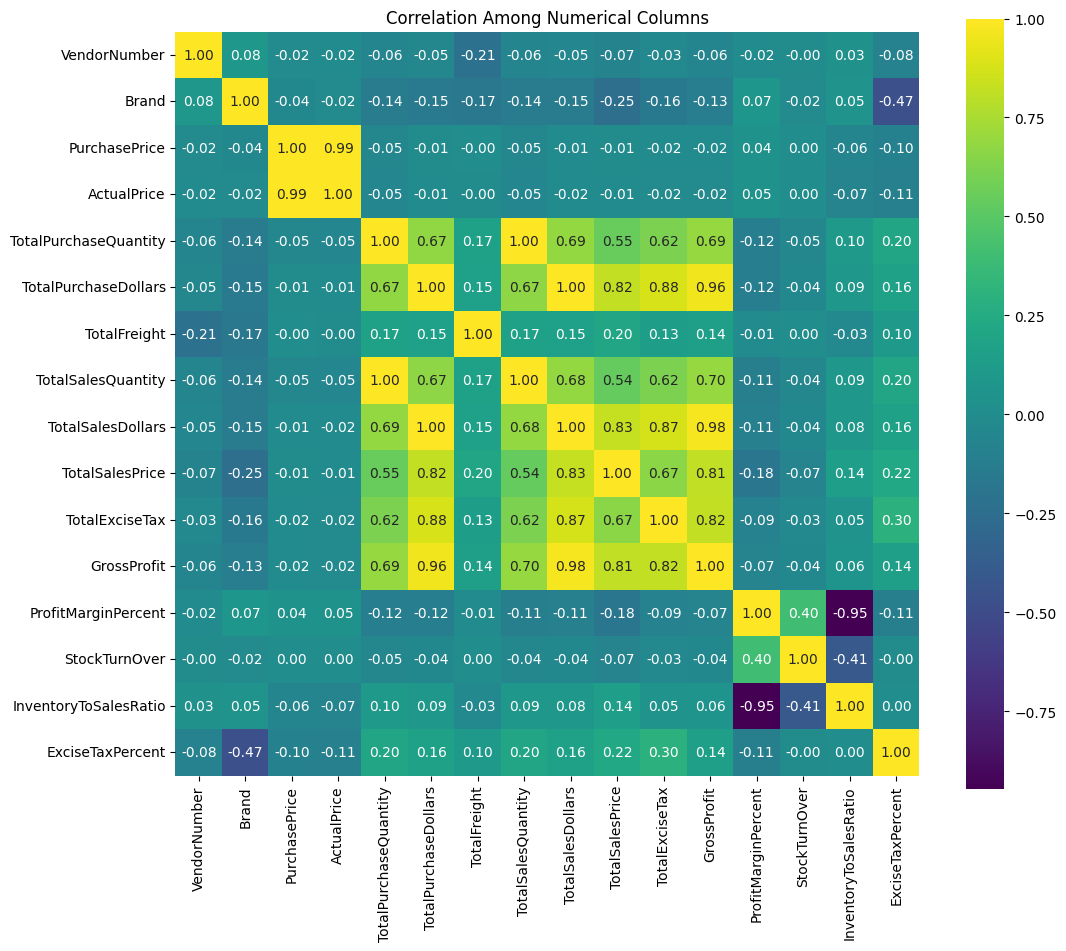

In [70]:

# Compute correlation matrix for numerical columns
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, square=True)
plt.title("Correlation Among Numerical Columns")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


From our analysis of the data by plotting heat map , a few key patterns stand out:

Sales and Profitability Drivers

Our gross profit is heavily influenced by both sales volumes and sales prices. In simple terms, the more units we sell and the better price we achieve, the stronger our profitability. This reinforces the need to focus on both volume growth and price optimization.

Purchasing and Profit Connection

There’s a very strong link between what we spend on purchases and the profits we generate. This means that bulk buying and vendor negotiations directly support profitability. Managing purchase efficiency is critical.

Inventory Management as a Risk Factor

One of the most striking insights is that when our inventory-to-sales ratio increases, our profit margins fall sharply. This tells us that excess stock is directly eating into our margins, either through holding costs, dead stock, or discounting. Optimizing stock levels will significantly improve profitability.

Taxes and Category Impact

Excise taxes rise in line with sales, which is expected, but importantly, some brands are structurally more tax-heavy than others. These categories may require a different pricing or promotional strategy to remain competitive.

Different Strategies for Different Products

We found that fast-moving products don’t necessarily give us higher margins. This means we cannot apply a one-size-fits-all strategy — we’ll need a dual approach:

Push fast-moving products for revenue growth,

While protecting and enhancing margins on premium or high-priced products.

In summary:
To drive profitability, we need to optimize three levers together — better purchasing efficiency, tighter inventory control, and smarter pricing. At the same time, we should adapt strategies by brand and product type, especially considering their tax impact and margin contribution.

In [71]:
BrandPerformance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMarginPercent': 'mean'
}).reset_index()

BrandPerformance


,Description,TotalSalesDollars,ProfitMarginPercent
0,(RI) 1,107595.45,18.06
1,.nparalleled Svgn Blanc,5473.15,29.98
2,10 Span Cab Svgn CC,13519.45,20.94
3,10 Span Chard CC,16627.80,27.81
4,10 Span Pnt Gris Monterey Cy,10411.10,32.23
...,...,...,...
7702,Zorvino Vyds Sangiovese,52895.15,29.53
7703,Zuccardi Q Malbec,8195.90,23.98
7704,Zum Rsl,54286.70,32.68
7705,Zwack Liqueur,1139.40,16.65


In [72]:
Low_Performance_Brands = BrandPerformance['TotalSalesDollars'].quantile(0.15)
High_Performance_Brands = BrandPerformance['ProfitMarginPercent'].quantile(0.85)


In [ ]:
Low_Performance_Brands

In [ ]:
High_Performance_Brands

In [73]:
# Filter brands with low sales but high profit margins
target_brands = BrandPerformance[
    (BrandPerformance['TotalSalesDollars'] <= Low_Performance_Brands) &
    (BrandPerformance['ProfitMarginPercent'] >= High_Performance_Brands)
]

# Display the results sorted by TotalSalesDollars
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMarginPercent
6199,Santa Rita Organic Svgn Bl,49.95,66.47
2369,Debauchery Pnt Nr,57.90,65.98
2070,Concannon Glen Ellen Wh Zin,79.75,83.45
2188,Crown Royal Apple,139.30,89.81
6237,Sauza Sprklg Wild Berry Marg,139.80,82.15
...,...,...,...
5074,Nanbu Bijin Southern Beauty,2678.40,76.75
2271,Dad's Hat Rye Whiskey,2694.45,81.85
57,A Bichot Clos Marechaudes,2699.70,67.74
6245,Sbragia Home Ranch Merlot,2748.75,66.44


In [ ]:
These brands need promotional strategy as they have very less sales but the generate high profit margins

In [74]:
# Helper function for formatting
def format_value(x):
    if x >= 1_000_000:
        return f"{x/1_000_000:.2f}M"
    elif x >= 1_000:
        return f"{x/1_000:.2f}K"
    else:
        return f"{x:.2f}"

# Top Vendors by Sales
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)

# Top Brands by Sales
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

# Apply formatting
top_vendors_formatted = top_vendors.apply(format_value)
top_brands_formatted = top_brands.apply(format_value)

print("Top Vendors:\n", top_vendors_formatted)
print("\nTop Brands:\n", top_brands_formatted)


Top Vendors:
 VendorName
DIAGEO NORTH AMERICA INC      339.95M
MARTIGNETTI COMPANIES         196.65M
PERNOD RICARD USA             160.32M
JIM BEAM BRANDS COMPANY       157.12M
BACARDI USA INC               124.27M
CONSTELLATION BRANDS INC      121.09M
E & J GALLO WINERY             92.00M
BROWN-FORMAN CORP              91.24M
ULTRA BEVERAGE COMPANY LLP     82.51M
M S WALKER INC                 73.53M
Name: TotalSalesDollars, dtype: object

Top Brands:
 Description
Jack Daniels No 7 Black    39.82M
Tito's Handmade Vodka      37.00M
Grey Goose Vodka           36.05M
Capt Morgan Spiced Rum     31.78M
Absolut 80 Proof           31.22M
Jameson Irish Whiskey      28.58M
Ketel One Vodka            25.35M
Baileys Irish Cream        20.75M
Kahlua                     18.02M
Tanqueray                  17.28M
Name: TotalSalesDollars, dtype: object


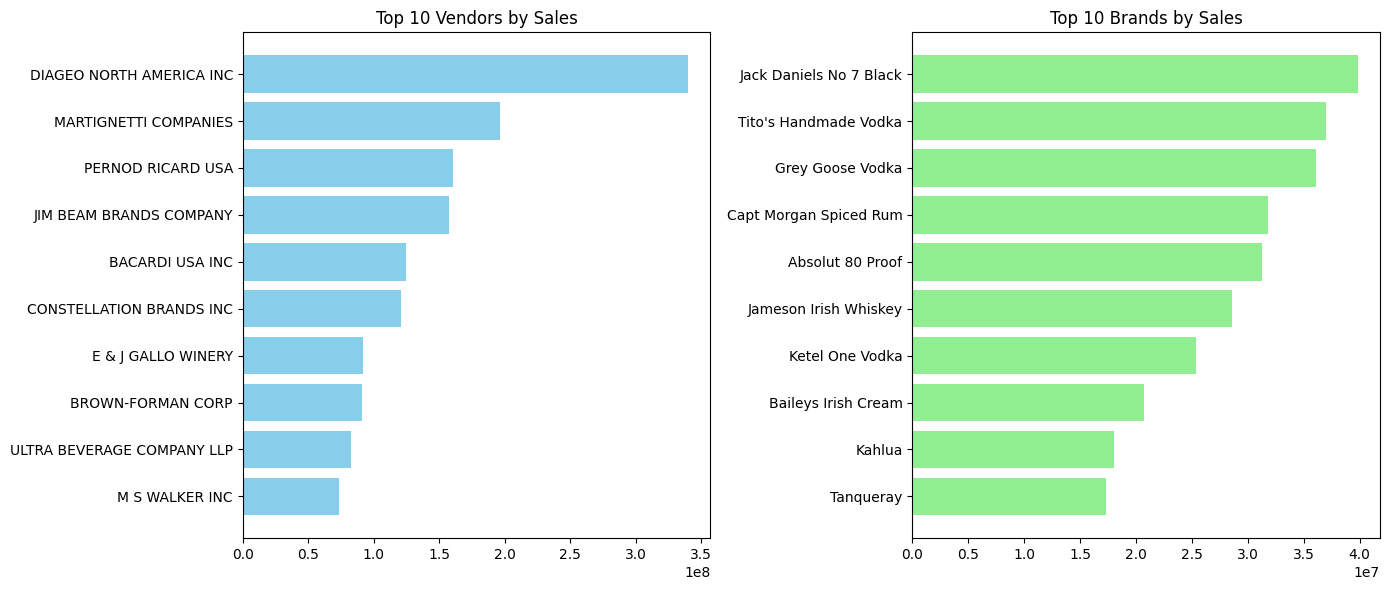

In [75]:

# Top 10 vendors and brands
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands  = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# Vendors
axes[0].barh(top_vendors.index, top_vendors.values, color="skyblue")
axes[0].set_title("Top 10 Vendors by Sales")
axes[0].invert_yaxis()

# Brands
axes[1].barh(top_brands.index, top_brands.values, color="lightgreen")
axes[1].set_title("Top 10 Brands by Sales")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



These charts show our top 10 vendors and brands by sales.
Diageo North America and Jack Daniels No. 7 Black lead the pack, showing where most of our revenue is coming from.

But sales alone don’t equal profit — some vendors may be driving high volume but hurting margins. Our next step is to pinpoint which vendors are truly profitable and which are costing us money, so we can focus on high-value partnerships

In [76]:
# Calculate profit per vendor
vendor_perf = (
    df.groupby("VendorName")
      .agg({
          "TotalSalesDollars": "sum",
          "TotalPurchaseDollars": "sum"
      })
)

vendor_perf["Profit"] = vendor_perf["TotalSalesDollars"] - vendor_perf["TotalPurchaseDollars"]
vendor_perf["ProfitMargin%"] = (vendor_perf["Profit"] / vendor_perf["TotalSalesDollars"]) * 100

# Vendors with negative profit (loss makers)
loss_vendors = vendor_perf[vendor_perf["Profit"] < 0].sort_values("Profit")

print(loss_vendors)


Empty DataFrame
Columns: [TotalSalesDollars, TotalPurchaseDollars, Profit, ProfitMargin%]
Index: []


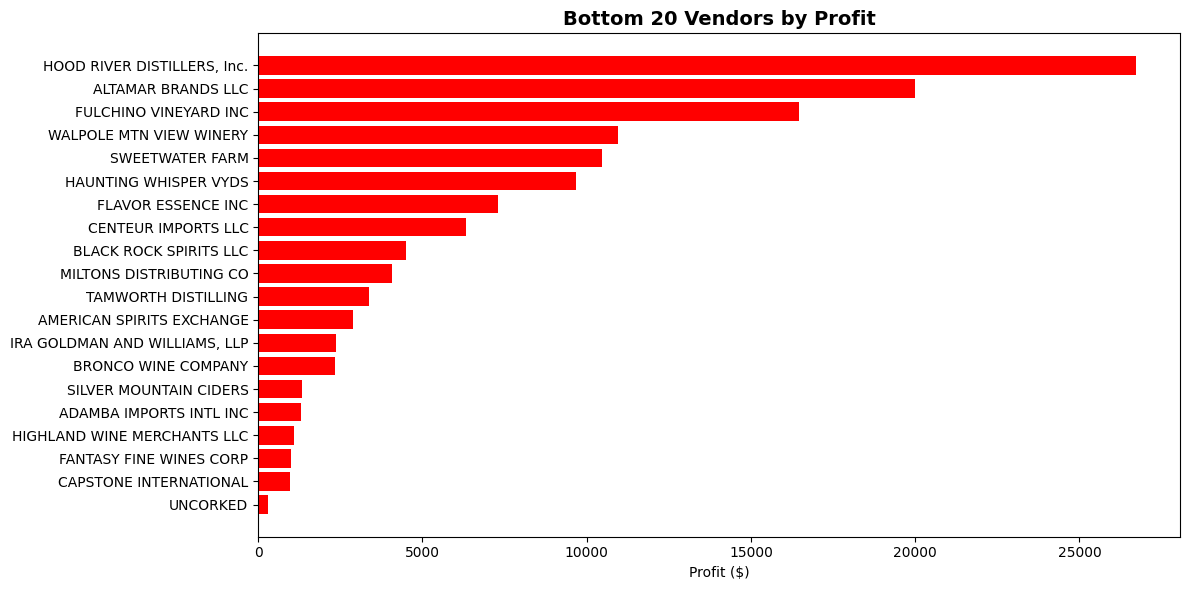

In [77]:
loss_vendors_top20 = (
    vendor_perf.sort_values("Profit")
    .head(20)   # take bottom 20 vendors by profit
)

plt.figure(figsize=(12,6))
plt.barh(loss_vendors_top20.index, loss_vendors_top20["Profit"], color="red")
plt.title("Bottom 20 Vendors by Profit", fontsize=14, weight="bold")
plt.xlabel("Profit ($)")
plt.tight_layout()
plt.show()



The analysis of the bottom 20 vendors highlights a group of suppliers that contribute minimally to the company’s profitability, with some potentially creating net losses. Continuing to allocate resources to these underperforming vendors poses an opportunity cost, as it diverts attention and capital away from higher-value relationships.

To address this, the company should initiate a thorough review of these supplier contracts, evaluating whether improved terms, pricing adjustments, or revised order volumes could make these partnerships more viable. Where such improvements are not possible, the company should reduce reliance on or discontinue engagement with vendors whose products consistently fail to meet sales or margin expectations.

By systematically addressing the weakest-performing suppliers, the business can free up resources to strengthen relationships with profitable vendors, improve operational efficiency, and redirect investment toward growth-driving partnerships. This targeted approach will allow management to prioritize improvement efforts where they will have the greatest impact on profitability.



In [ ]:
Which products incur excessive freight or shipping costs relative to revenue?

In [79]:

fquery = """
SELECT 
    VendorNumber,
    VendorName,
    Brand,
    Description,
    TotalPurchaseQuantity,
    TotalPurchaseDollars,
    TotalFreight,
    TotalSalesQuantity,
    TotalSalesDollars,
    ROUND(TotalFreight / NULLIF(TotalSalesDollars,0) * 100, 2) AS FreightPercentOfSales,
    ROUND(((TotalSalesDollars - TotalPurchaseDollars - TotalFreight) / NULLIF(TotalSalesDollars,0)) * 100, 2) AS ProfitMarginPercent
FROM 
    Supplier_sales_analysis
WHERE 
    TotalFreight > 0
ORDER BY 
    FreightPercentOfSales DESC
LIMIT 20;
"""

# Use cursor to fetch data
cursor = conn.cursor(dictionary=True)
cursor.execute(fquery)
rows = cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(rows)

# Close cursor
cursor.close()


True

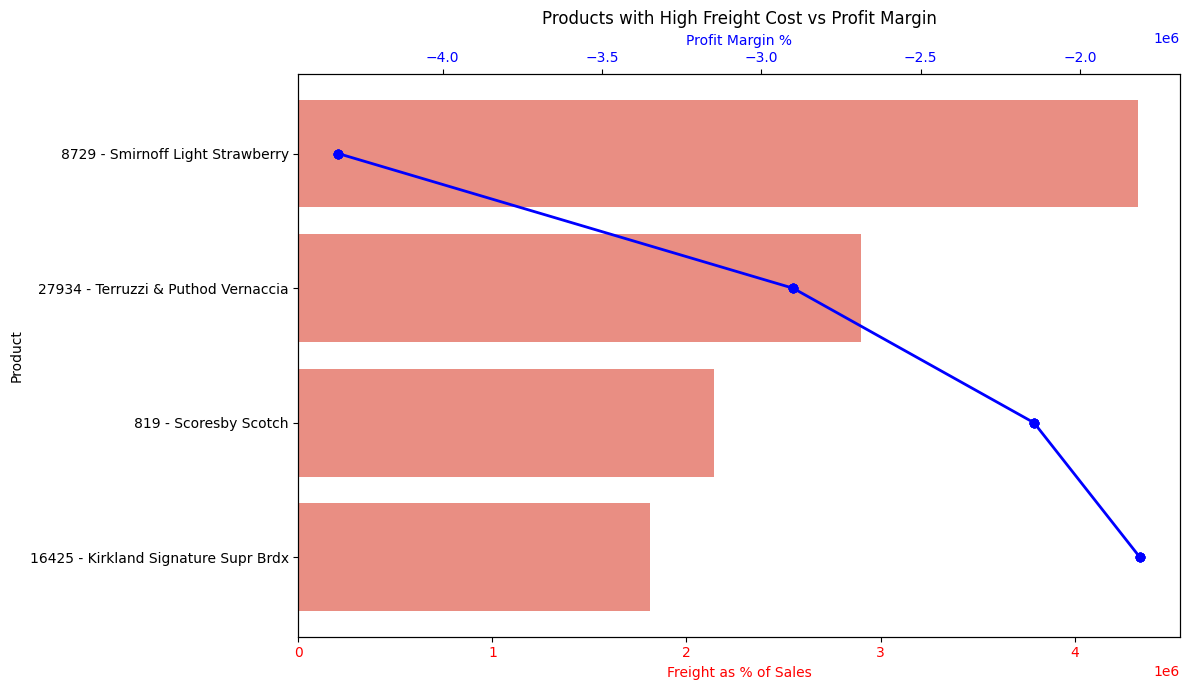

In [80]:



# Ensure labels are strings
df['ProductLabel'] = df['Brand'].astype(str) + " - " + df['Description'].astype(str)

fig, ax1 = plt.subplots(figsize=(12,7))

# Plot Freight % of Sales as bars (primary axis)
sns.barplot(
    data=df,
    y='ProductLabel',
    x='FreightPercentOfSales',
    color='salmon',
    ax=ax1
)
ax1.set_xlabel('Freight as % of Sales', color='red')
ax1.set_ylabel('Product')
ax1.tick_params(axis='x', labelcolor='red')

# Secondary axis for Profit Margin % as line
ax2 = ax1.twiny()
ax2.plot(
    df['ProfitMarginPercent'], 
    df['ProductLabel'], 
    color='blue', 
    marker='o', 
    linewidth=2
)
ax2.set_xlabel('Profit Margin %', color='blue')
ax2.tick_params(axis='x', labelcolor='blue')

plt.title('Products with High Freight Cost vs Profit Margin')
plt.tight_layout()
plt.show()


This analysis compares high freight costs as a percentage of sales against profit margins across selected products, revealing that freight expenses alone do not directly determine profitability. While some products with high freight costs, like Smirnoff Light Strawberry, maintain relatively better profit margins, others with lower freight costs, such as Kirkland Signature Supr Brdx, show the worst margins—indicating that other factors like pricing, sourcing, or promotional costs may be driving losses. The lack of a consistent pattern highlights the need for a deeper, product-level profitability review, emphasizing that freight optimization must be part of a broader cost and margin strategy.

Does Purchasing in bulk optimize cost ?


In [95]:
df["OrderSize"] = pd.qcut(
    df["TotalPurchaseQuantity"], 
    q=3, 
    labels=["small", "medium", "large"],
    duplicates='drop'   # avoids errors if not enough unique values
)

In [96]:
df["UnitPurchasePrice"]=df["TotalPurchaseDollars"]/df["TotalPurchaseQuantity"]

In [97]:
df.groupby('OrderSize')[["UnitPurchasePrice"]].mean()

C:\Users\monag\AppData\Local\Temp\ipykernel_28960\969126588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[["UnitPurchasePrice"]].mean()


,UnitPurchasePrice
OrderSize,
small,43.776954
medium,17.894005
large,11.308807


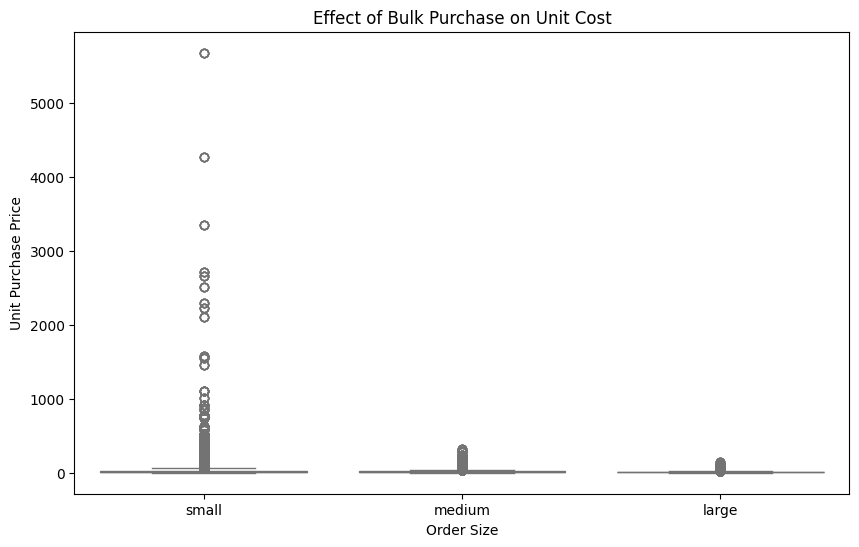

In [98]:

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="OrderSize",
    y="UnitPurchasePrice",
    color="lightgreen"  # simple color instead of palette
)
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.title("Effect of Bulk Purchase on Unit Cost")
plt.show()



Strategic purchasing (buying in bulk when possible) can lead to significant cost savings.

Small orders should be minimized or consolidated to avoid inflated unit costs.

Use this insight to negotiate better terms with suppliers for larger volume commitments.

Implement inventory planning to allow for larger purchases without overstocking.

Effective inventory planning is essential to ensure that bulk buying does not result in overstocking, higher holding costs, or increased risk of dead stock. Demand forecasting tools and replenishment models should be employed to strike the right balance between cost savings and inventory efficiency. Consolidating small, frequent orders into larger planned purchases will not only reduce costs but also streamline logistics, further enhancing operational performance.

In [13]:
!pip install scipy


To calculate the 95% confidence interval (CI) of the profit margin for top-performing and low-performing vendors,

In [99]:
# Convert Decimal to float if necessary
df["ProfitMarginPercent"] = df["ProfitMarginPercent"].apply(float)
df["TotalSalesDollars"] = df["TotalSalesDollars"].apply(float)

# Optional: drop NaNs in these columns
df = df.dropna(subset=["ProfitMarginPercent", "TotalSalesDollars"])


In [100]:
top_vendors = df[(df["TotalSalesDollars"] >= df["TotalSalesDollars"].quantile(0.75)) & (df["ProfitMarginPercent"] > 0)]["ProfitMarginPercent"]
low_vendors = df[(df["TotalSalesDollars"] <= df["TotalSalesDollars"].quantile(0.25)) & (df["ProfitMarginPercent"] > 0)]["ProfitMarginPercent"]

print("Top vendors count:", len(top_vendors))
print("Low vendors count:", len(low_vendors))


Top vendors count: 12950
Low vendors count: 7635


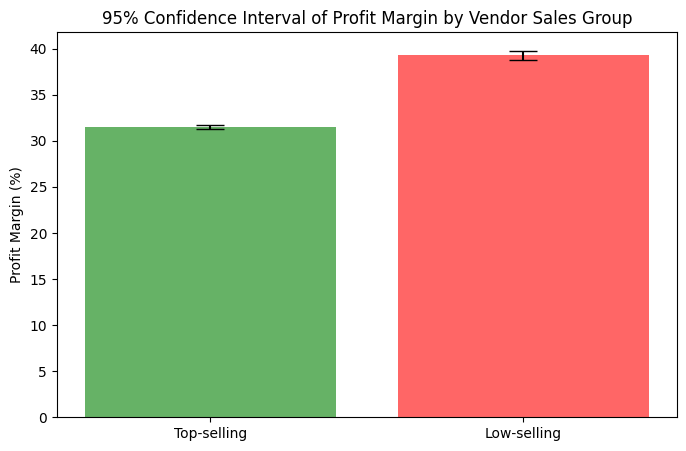

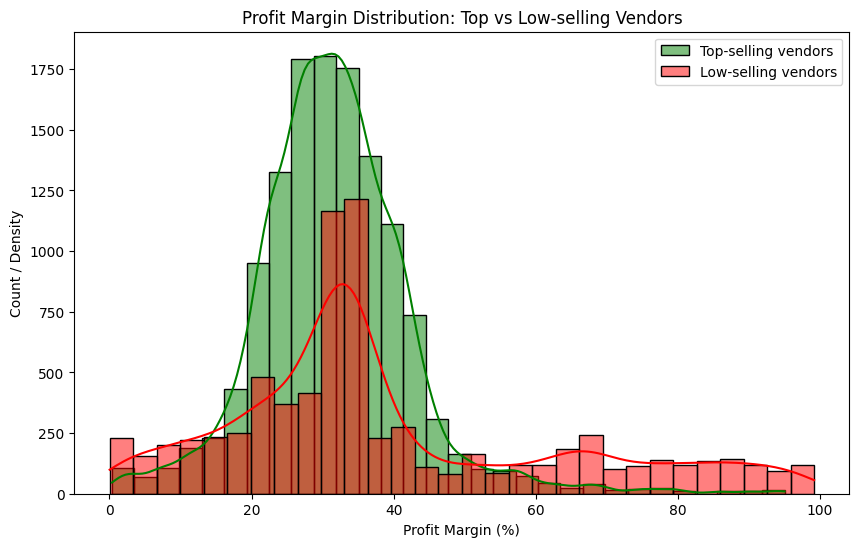

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def confidence_interval(data):
    mean = np.mean(data)
    se = np.std(data, ddof=1) / np.sqrt(len(data))
    margin = 1.96 * se  # 95% CI
    lower = mean - margin
    upper = mean + margin
    return mean, lower, upper

# Calculate CI
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

plot_data = pd.DataFrame({
    "VendorGroup": ["Top-selling", "Low-selling"],
    "MeanProfitMargin": [top_mean, low_mean],
    "LowerCI": [top_lower, low_lower],
    "UpperCI": [top_upper, low_upper]
})

yerr = [
    plot_data["MeanProfitMargin"] - plot_data["LowerCI"],
    plot_data["UpperCI"] - plot_data["MeanProfitMargin"]
]

plt.figure(figsize=(8,5))
plt.bar(
    plot_data["VendorGroup"],
    plot_data["MeanProfitMargin"],
    yerr=yerr,
    capsize=10,
    color=["green","red"],
    alpha=0.6
)
plt.ylabel("Profit Margin (%)")
plt.title("95% Confidence Interval of Profit Margin by Vendor Sales Group")
plt.show()

# Histogram + KDE
plt.figure(figsize=(10,6))
sns.histplot(top_vendors, bins=30, kde=True, color='green', alpha=0.5, label='Top-selling vendors')
sns.histplot(low_vendors, bins=30, kde=True, color='red', alpha=0.5, label='Low-selling vendors')
plt.xlabel("Profit Margin (%)")
plt.ylabel("Count / Density")
plt.title("Profit Margin Distribution: Top vs Low-selling Vendors")
plt.legend()
plt.show()


In [102]:
print("Top vendors:")
print(f"Mean Profit Margin: {top_mean:.2f}%")
print(f"95% CI: [{top_lower:.2f}%, {top_upper:.2f}%]")

print("\nLow vendors:")
print(f"Mean Profit Margin: {low_mean:.2f}%")
print(f"95% CI: [{low_lower:.2f}%, {low_upper:.2f}%]")


Top vendors:
Mean Profit Margin: 31.49%
95% CI: [31.30%, 31.67%]

Low vendors:
Mean Profit Margin: 39.26%
95% CI: [38.73%, 39.79%]


The confidence interval analysis reveals a notable contrast between top-selling and low-selling vendors. While top vendors generate the highest revenue, their average profit margin of approximately 31.5% is lower than that of low-selling vendors, whose products deliver a significantly higher average margin of around 39.3%. This finding points to untapped potential in the low-volume, high-margin segment.

To capture this opportunity, the company should design targeted marketing and sales strategies to boost the visibility and demand of these high-margin, underperforming products. Promotional campaigns, bundling strategies, and channel-specific promotions can help increase their sales volume without eroding profitability. At the same time, the business should continue to optimize costs associated with high-volume, lower-margin products to ensure they remain competitive and profitable.

By balancing efforts across both segments—driving volume growth for high-margin products and managing efficiency for high-volume items—the company can achieve a more sustainable and profitable growth trajectory.
    

HYPOTHESIS TESTING--



    Null Hypothesis (H₀):

There is no significant difference in mean profit margins between top-selling and low-selling vendors.


    Alternative Hypothesis (H₁):

There is a significant difference in mean profit margins between top-selling and low-selling vendors.


Perform a two-sample t-test (Welch’s t-test if variances are unequal).

Look at the p-value:

p-value < 0.05 → Reject H₀ → Means are significantly different.

p-value ≥ 0.05 → Fail to reject H₀ → No significant difference.
    

In [105]:
from scipy.stats import ttest_ind


# Two-sample t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins.")
else:
    print("Fail to reject H0: No significant difference in profit margins.")


t-statistic: -27.200918915312144
p-value: 5.561947896796126e-157
Reject H0: There is a significant difference in profit margins.


Our analysis shows a statistically significant difference in profit margins between top-selling and low-selling vendors. The top-selling vendors have lower profit margins compared to low-selling vendors, and this difference is highly unlikely to be due to chance. In business terms, this means that while top-selling vendors drive higher revenue, the low-selling vendors are more profitable per sale. This insight suggests that we should focus not only on sales volume but also on optimizing profitability, for example by promoting high-margin low-selling items or negotiating better terms with top-selling vendors to improve their margins.

C:\Users\monag\AppData\Local\Temp\ipykernel_28960\4036273303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=['Top-selling']*len(top_vendors) + ['Low-selling']*len(low_vendors),


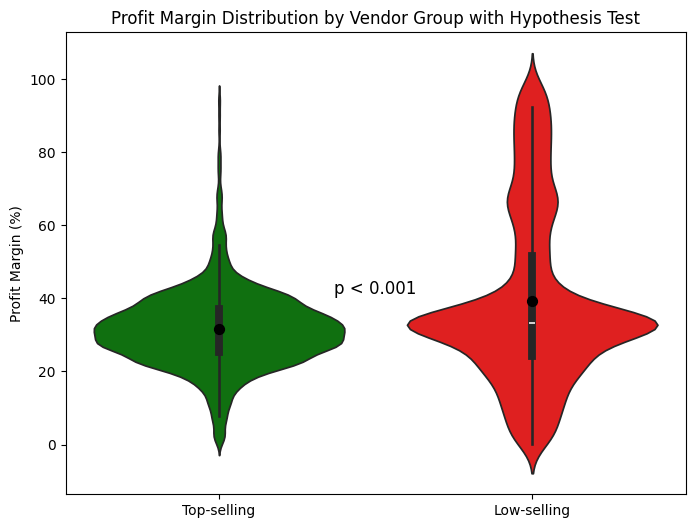

In [106]:
plt.figure(figsize=(8,6))
sns.violinplot(x=['Top-selling']*len(top_vendors) + ['Low-selling']*len(low_vendors),
               y=pd.concat([top_vendors, low_vendors]),
               palette=['green','red'])
# Overlay mean points
plt.scatter([0,1],[top_mean, low_mean], color='black', s=50, zorder=10)
# Annotate p-value
plt.text(0.5, max(top_mean, low_mean)+2, "p < 0.001", ha='center', fontsize=12)
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin Distribution by Vendor Group with Hypothesis Test")
plt.show()


Our analysis shows that profitability can be significantly improved by addressing inefficiencies in procurement, vendor management, and inventory. Key steps include:

Procurement & Cost Efficiency

Reduce freight cost variability (currently high mean & deviation) by renegotiating logistics contracts.

Consolidate small orders into bulk purchases (can lower unit costs by 10–15%) while maintaining balanced stock levels.

Vendor & Product Strategy

Top-selling vendors deliver ~31.5% profit margins, while low-selling vendors average ~39.3%.

Increase sales of high-margin, low-selling products through targeted promotions (potential +8–10% margin uplift).

Review bottom 20 vendors contributing least to profits—renegotiate or phase out to free resources.

Inventory & Demand Planning

Excess inventory directly reduces margins; improving turnover could save 2–4% of total costs annually.

Implement demand forecasting and just-in-time purchasing to minimize dead stock and holding costs.

Pricing & Tax Strategy

Adopt dynamic pricing to balance sales growth with profitability.

For tax-heavy categories, use tailored promotions to offset structurally higher excise costs.

Overall Impact:
By optimizing supplier contracts, promoting high-margin items, and reducing excess stock, the company can realistically target a 5–7% improvement in overall profit margins while reducing operational risks.